In [347]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


def contained_in_rectangle(rect_bounds, point):
    a = rect_bounds[0]
    b = rect_bounds[1]
    c = rect_bounds[2]
    d = rect_bounds[3]
    
    if point[0] > a and point[0] < b and point[1] > c and point[1] < d:
        return True
    else:
        return False

def generate_sample_point(rect_bounds):
    
    x = random.uniform(0, 1) * 100
    y = random.uniform(0, 1) * 100

    if contained_in_rectangle(rect_bounds, [x,y]):
        sample = {'input': np.array([[1.0,x,y]]),'label':True}
#         print 'true'
    else:
        sample = {'input': np.array([[1.0,x,y]]),'label':False}
        
    return sample

def generate_sample_set(rect_bounds, num_of_samples):
    sample_set = []
    for i in range(num_of_samples):
        sample_point = generate_sample_point(rect_bounds)
        sample_set.append(sample_point)
    return sample_set 

def logistic(v):
    return 1.0/(1 + np.exp(-v))

In [348]:
#Training phase
samples = generate_sample_set([10,50,10,50],100)
bias = 0.5
learning_rate = 0.1
weights = np.array([[bias,0.0,0.0]])

for i in range(10000):
    miss_classified_count = 0
    for sample in samples:
        v = (np.dot(sample['input'],weights.T))
        sigmoid_result = logistic(v)
        desired_result = sample['label']
        current_result = sigmoid_result >= 0.5
        if current_result != desired_result:
            error = desired_result - sigmoid_result
            weights = weights + (learning_rate*error*sample['input'])
            miss_classified_count += 1
print weights,miss_classified_count      

/home/ruby/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp


[[ 271.36660135   -9.45277348  -10.16419597]] 22


1000


/home/ruby/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp


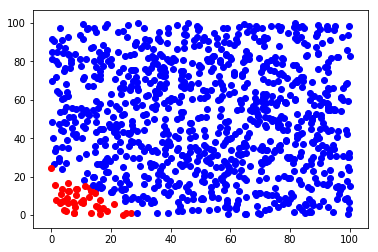

In [349]:
#testing phase
test_samples = generate_sample_set([10,50,10,50],1000)
print len(test_samples)
for sample in test_samples:
    v = (np.dot(sample['input'],weights.T))
    sigmoid_result = logistic(v)
    if sigmoid_result >= 0.5:
        plt.scatter(sample['input'][0][1],sample['input'][0][2],c='r')
    else:
        plt.scatter(sample['input'][0][1],sample['input'][0][2],c='b')